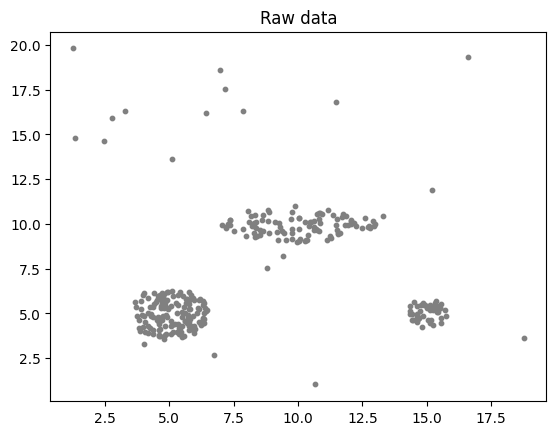

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_challenging_dataset():
    np.random.seed(42)
    # 원형 클러스터 1 (밀도 높음)
    circle_center1 = [5, 5]
    circle_radius1 = 1.5
    circle_points1 = []
    for _ in range(150):
        angle = np.random.uniform(0, 2 * np.pi)
        r = circle_radius1 * np.sqrt(np.random.uniform(0, 1))
        x = circle_center1[0] + r * np.cos(angle)
        y = circle_center1[1] + r * np.sin(angle)
        circle_points1.append([x, y])
    circle_points1 = np.array(circle_points1)

    # 타원형 클러스터 (밀도 낮음)
    ellipse_center = [10, 10]
    ellipse_points = []
    for _ in range(100):
        angle = np.random.uniform(0, 2 * np.pi)
        r1 = 3 * np.sqrt(np.random.uniform(0, 1))
        r2 = 1.0 * np.sqrt(np.random.uniform(0, 1))
        x = ellipse_center[0] + r1 * np.cos(angle)
        y = ellipse_center[1] + r2 * np.sin(angle)
        ellipse_points.append([x, y])
    ellipse_points = np.array(ellipse_points)

    # 작은 원형 클러스터 2 (밀도 중간)
    circle_center2 = [15, 5]
    circle_radius2 = 0.8
    circle_points2 = []
    for _ in range(50):
        angle = np.random.uniform(0, 2 * np.pi)
        r = circle_radius2 * np.sqrt(np.random.uniform(0, 1))
        x = circle_center2[0] + r * np.cos(angle)
        y = circle_center2[1] + r * np.sin(angle)
        circle_points2.append([x, y])
    circle_points2 = np.array(circle_points2)

    # 이상치 추가
    outliers = np.random.uniform(low=0, high=20, size=(20, 2))

    # 데이터 합치기
    data = np.vstack([circle_points1, ellipse_points, circle_points2, outliers])
    return data

X = generate_challenging_dataset()
plt.scatter(X[:, 0], X[:, 1], s=10, c='gray')
plt.title('Raw data')
plt.show()


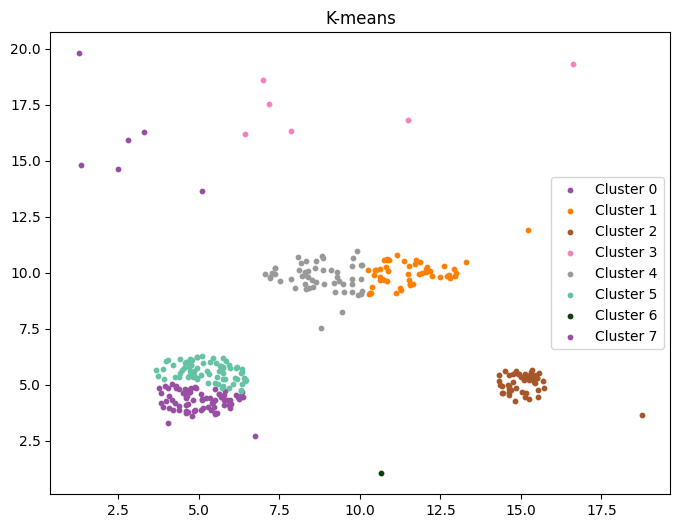

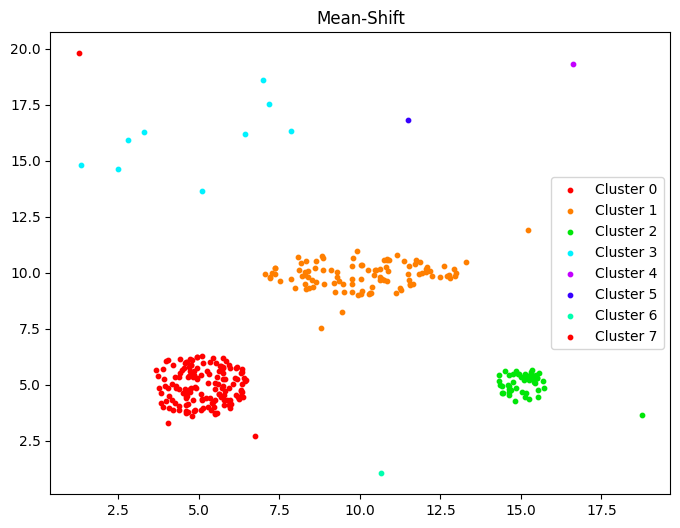

In [3]:
from sklearn.cluster import KMeans, MeanShift

# K-means (군집 개수 3개 지정)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Mean-Shift (군집 개수 자동 결정)
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X)

X = generate_challenging_dataset()

custom_colors_kmeans = ['#984ea3', '#ff7f00', '#a65628', '#f781bf', '#999999', '#66c2a5', '#0A400C'] # 빨강, 파랑, 초록
custom_colors_meanshift = ["#ff0000", '#ff7f00', "#00e608", "#00f2ff", "#C300FF", "#3700ff", "#00FFAE"]

def plot_clusters_custom_colors(X, labels, colors, title):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], s=10, label=f'Cluster {label}')
    plt.title(title)
    plt.legend()
    plt.show()

# K-means 결과
plot_clusters_custom_colors(X, kmeans_labels, custom_colors_kmeans, 'K-means')

# Mean-Shift 결과
plot_clusters_custom_colors(X, mean_shift_labels, custom_colors_meanshift, 'Mean-Shift')
